### 1. Start the Environment

We begin by importing the necessary packages. 

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!

In [2]:
env = UnityEnvironment(file_name="/Users/nikhil/Downloads/Tennis-MultiAgent-master/Tennis.app",no_graphics=True)

Mono path[0] = '/Users/nikhil/Downloads/Tennis-MultiAgent-master/Tennis.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/nikhil/Downloads/Tennis-MultiAgent-master/Tennis.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# import numpy as np

# # Assuming 'env' is your Unity environment
# env.reset()

# # Assuming 'brain_name' is the name of your Unity brain
# brain_name = "TennisBrain"

# # Assuming continuous action space
# action_size = env.brains[brain_name].vector_action_space_size
# num_agents = len(env.brains[brain_name].agents)  # Corrected attribute

# # Take random actions for demonstration purposes
# for _ in range(100):
#     actions = np.random.randn(num_agents, action_size)
#     env.step(actions)

# env.close()


AttributeError: 'BrainParameters' object has no attribute 'agents'

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain)

Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -7.38993645 -1.5
 -0.          0.          6.83172083  5.99607611 -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell,we will control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.

Of course, as part of the project, the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:

for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))


Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.10000000149011612
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.10000000149011612
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

### Training the network


In [7]:
!pip install gym

In [10]:
import gym
import random
import torch
import numpy as np
from collections import deque
import os 
os.chdir(os.path.expanduser("/Users/nikhil/Downloads/Tennis-MultiAgent-master/"))
import random_p as rm
# from schdule import LinearSchedule
import matplotlib.pyplot as plt
%matplotlib inline

#### Solving this envirenment with DDPG agent

In [11]:
from ddpg_agent import Agent
agent = Agent(state_size, action_size,num_agents,fc1=400,fc2=300, seed=0)

#### Training the agent

Episode 300	Average Score: 0.00
Episode 600	Average Score: 0.07
Episode 900	Average Score: 0.04
Episode 1200	Average Score: 0.37
Episode 1500	Average Score: 0.00
Episode 1800	Average Score: 0.00
Episode 2100	Average Score: 0.00
Episode 2400	Average Score: 0.00
Episode 2700	Average Score: 0.06
Episode 2774	Average Score: 3.03
Environment solved in 2674 episodes!	Average Score: 3.03


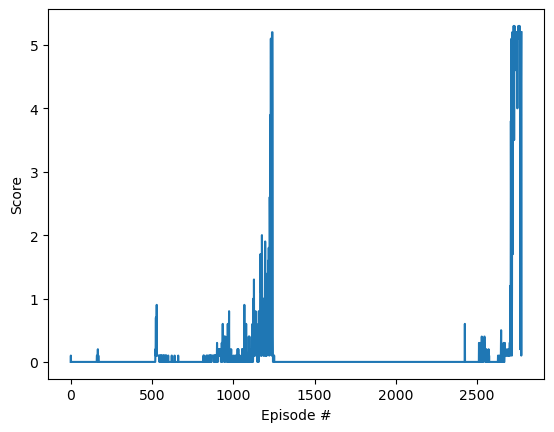

In [9]:
def ddpg(n_episodes=15000):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        agent.reset_random()              #reset noise object
        state = env_info.vector_observations
        
        score = 0
        t=0
        while True:
            t=t+1
            action=agent.act(state)
            env_info = env.step(np.array(action))[brain_name] 
            next_state = env_info.vector_observations   # get the next state
            reward = env_info.rewards                   # get the reward

            done = env_info.local_done
            agent.step(state, action, reward, next_state, done)
            state = next_state
            #print(reward)
            score += max(reward)
            if np.any(done):
                break 

        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 300 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=3:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.critic_local.state_dict(), 'trained_weights/checkpoint_critic.pth')
            torch.save(agent.actor_local.state_dict(), 'trained_weights/checkpoint_actor.pth')
            break
    return scores

scores = ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Load the app with the trained weights 

In [10]:
agent.critic_local.load_state_dict(torch.load('trained_weights/checkpoint_critic.pth'))
agent.actor_local.load_state_dict(torch.load('trained_weights/checkpoint_actor.pth'))

<All keys matched successfully>

### See your trained agent perform the task.

In [11]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations            # get the current state
#print(state.shape)
score = 0    
reward_i=[]# initialize the score
past_a=deque(maxlen=5)
while True:
    action=[]

    action=agent.act(state)        # select an action
    env_info = env.step(np.array(action))[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations   # get the next state
    reward = env_info.rewards                  # get the reward
    done = env_info.local_done                 # see if episode has finished
    score += np.mean(reward)                   # update the score
    state = next_state                         # roll over the state to next time step

    if np.any(done):                           # exit loop if episode finished
        break
    
print("Score: {}".format(score))


Score: 2.600000038743019


In [12]:
env.close()